GAN으로 새로운 음성을 생성해보자.

In [8]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


In [9]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 32
y_size = 128
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 300001
batch = 16

In [10]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32768)             3309568   
_________________________________________________________________
batch_normalization_2 (Batch (None, 32768)             131072    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 32, 128)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 64, 64)        204864    
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 64, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 16, 64, 64)       

In [11]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
# discriminator.trainable = False
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 64, 64)        1664      
_________________________________________________________________
activation_4 (Activation)    (None, 16, 64, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 32, 128)        204928    
_________________________________________________________________
activation_5 (Activation)    (None, 8, 32, 128)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 32, 128)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)            

In [12]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
discriminator.trainable = False
ginput = Input(shape=(nosie_size,))                    
dis_output = discriminator(generator(ginput))         
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 32, 128, 1)        3647361   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 239361    
Total params: 3,886,722
Trainable params: 3,581,697
Non-trainable params: 305,025
_________________________________________________________________


In [13]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
print(X_train.shape)    # (2331, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2331, 128, 32)


28, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128,

(2331, 128, 32)

In [14]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2331, 128, 32)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.00016182661 -80.0

  scale = MaxAbsScaler()
    #   절대값이 0~1사이에 매핑
    #   -1 ~ 1 사이로 재조정
  X_train = scale.fit_transform(X_train)
  print(X_train.shape)   # (2331, 4096)
  print(np.max(X_train), np.min(X_train))   # -2.0228326e-06 -1.0


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 32, 128, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        # gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            # idx2 = np.random.randint(0, gen_imgs.shape[0])
            idx2 = 5    # 출력 값 고정
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 32, 128, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (862,128))
            # gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            # print(gen_mels.shape) # (862, 128)
            # gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan17\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
            

gan_train(epochs, batch, 500)


end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

ch:25678  d_loss:0.1320  g_loss:6.3066
epoch:25679  d_loss:0.0825  g_loss:7.8493
epoch:25680  d_loss:0.3840  g_loss:6.3941
epoch:25681  d_loss:0.3328  g_loss:2.8016
epoch:25682  d_loss:1.2375  g_loss:3.1643
epoch:25683  d_loss:0.0099  g_loss:7.5961
epoch:25684  d_loss:0.1590  g_loss:10.0706
epoch:25685  d_loss:0.8466  g_loss:6.1581
epoch:25686  d_loss:0.4265  g_loss:3.6547
epoch:25687  d_loss:0.4456  g_loss:2.0503
epoch:25688  d_loss:0.3922  g_loss:4.9671
epoch:25689  d_loss:0.0565  g_loss:6.6454
epoch:25690  d_loss:0.2968  g_loss:7.3317
epoch:25691  d_loss:0.0526  g_loss:4.9524
epoch:25692  d_loss:0.4690  g_loss:3.6008
epoch:25693  d_loss:0.4344  g_loss:3.3950
epoch:25694  d_loss:0.4467  g_loss:4.2278
epoch:25695  d_loss:0.6341  g_loss:3.9426
epoch:25696  d_loss:0.4935  g_loss:6.8352
epoch:25697  d_loss:0.8436  g_loss:4.9163
epoch:25698  d_loss:0.5851  g_loss:4.2477
epoch:25699  d_loss:0.2609  g_loss:5.4812
epoch:25700  d_loss:0.0663  g_loss:6.7323
epoch:25701  d_loss:0.2525  g_loss:7

KeyboardInterrupt: 

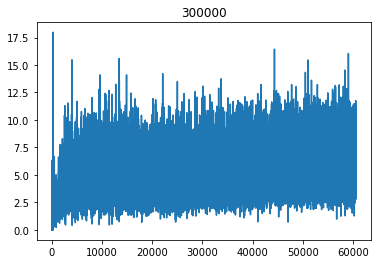

In [3]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan15.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

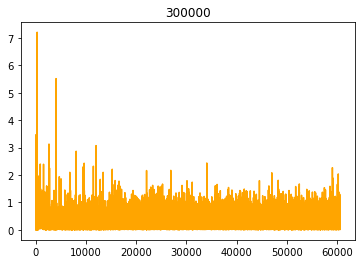

In [4]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()